In [1]:
# importing necessary source
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

# Data Collection and Preprocessing

In [2]:
wh_data = pd.read_csv('weight-height.csv')
wh_data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
wh_data.shape

(8555, 3)

In [4]:
wh_data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder # for enconding Gender

In [6]:
enc = LabelEncoder()
wh_data['Gender'] = enc.fit_transform(wh_data['Gender'])

In [7]:
wh_data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
wh_data.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [9]:
x = wh_data.drop('Weight', axis=1)
y = wh_data['Weight']

In [10]:
print(x.shape)
print(y.shape)

(8555, 2)
(8555,)


# Train and Test data

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
print(x.shape, xtrain.shape, xtest.shape)

(8555, 2) (5988, 2) (2567, 2)


# Model Training --> LinearRegression

In [13]:
linearModel = LinearRegression()

In [14]:
linearModel.fit(xtrain, ytrain)

LinearRegression()

# Model Evaluation --> LinearRegression

In [15]:
linearAccuracy = linearModel.score(xtest, ytest)

In [16]:
 pred_y = linearModel.predict(xtest)

In [17]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(ytest, pred_y)

In [18]:
wh_data['Linear_pred_Weight'] = linearModel.predict(x)

In [19]:
print('Accuracy of LinearReagression ', linearAccuracy)
print('Mean Square Error of LinearRegression ', mse_linear)
print(wh_data.head())
print(wh_data.tail())

Accuracy of LinearReagression  0.9059959607091161
Mean Square Error of LinearRegression  99.67250998070027
   Gender     Height      Weight  Linear_pred_Weight
0       1  73.847017  241.893563          215.574352
1       1  68.781904  162.310473          185.341329
2       1  74.110105  212.740856          217.144694
3       1  71.730978  220.042470          202.943984
4       1  69.881796  206.349801          191.906445
      Gender     Height      Weight  Linear_pred_Weight
8550       0  60.483946  110.565497          116.468265
8551       0  63.423372  129.921671          134.013329
8552       0  65.584057  155.942671          146.910187
8553       0  67.429971  151.678405          157.928220
8554       0  60.921791  131.253738          119.081708


# Model Training --> KNeighborsRegressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn = KNeighborsRegressor()

In [22]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

# Model Evaluation --> KNeighborsRegressor

In [23]:
knnAccuracy = knn.score(xtest, ytest)

In [24]:
y_pred_knn = knn.predict(xtest)

In [25]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mse_knn = mean_squared_error(ytest, y_pred_knn)

In [26]:
wh_data['knn_pred_Weight'] = knn.predict(x)

In [27]:
print('Accuracy of KNeighborsRegressor ', knnAccuracy)
print('Mean Square Error of KNeighborsRegressor ', mse_knn)
print(wh_data.head())
print(wh_data.tail())

Accuracy of KNeighborsRegressor  0.8838502073708883
Mean Square Error of KNeighborsRegressor  123.15365863436983
   Gender     Height      Weight  Linear_pred_Weight  knn_pred_Weight
0       1  73.847017  241.893563          215.574352       222.249723
1       1  68.781904  162.310473          185.341329       181.243871
2       1  74.110105  212.740856          217.144694       220.883791
3       1  71.730978  220.042470          202.943984       199.347460
4       1  69.881796  206.349801          191.906445       193.719655
      Gender     Height      Weight  Linear_pred_Weight  knn_pred_Weight
8550       0  60.483946  110.565497          116.468265       114.899508
8551       0  63.423372  129.921671          134.013329       135.770862
8552       0  65.584057  155.942671          146.910187       146.748282
8553       0  67.429971  151.678405          157.928220       161.587442
8554       0  60.921791  131.253738          119.081708       118.242226


# Optimizing Algorithm with Hyper parameter Tuning

In [28]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [29]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,1000))
p=[1,2]

grids = {
    'leaf_size': leaf_size,
    'n_neighbors': n_neighbors,
    'p': p
}

In [30]:
grids

{'leaf_size': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  1

In [31]:
# Randomized Search CV
rscv = RandomizedSearchCV(knn,grids, n_iter=500, cv=3)

In [32]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=500,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'p': [1, 2]})

In [33]:
results = pd.DataFrame(rscv.cv_results_)

In [34]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,param_n_neighbors,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004668,4.713707e-04,0.161369,0.001247,2,714,21,"{'p': 2, 'n_neighbors': 714, 'leaf_size': 21}",0.845370,0.845949,0.851421,0.847580,0.002726,413
1,0.004668,9.427969e-04,0.096688,0.000943,1,390,33,"{'p': 1, 'n_neighbors': 390, 'leaf_size': 33}",0.874980,0.875383,0.884120,0.878161,0.004217,168
2,0.004669,4.701903e-04,0.177372,0.000942,2,760,12,"{'p': 2, 'n_neighbors': 760, 'leaf_size': 12}",0.842052,0.842387,0.847908,0.844116,0.002685,437
3,0.003668,4.718200e-04,0.222383,0.001248,2,983,40,"{'p': 2, 'n_neighbors': 983, 'leaf_size': 40}",0.826766,0.826091,0.831256,0.828038,0.002292,495
4,0.004001,2.973602e-07,0.231052,0.002161,1,931,12,"{'p': 1, 'n_neighbors': 931, 'leaf_size': 12}",0.846965,0.846626,0.852835,0.848809,0.002850,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.004002,1.123916e-07,0.174372,0.000943,1,721,21,"{'p': 1, 'n_neighbors': 721, 'leaf_size': 21}",0.858131,0.858427,0.865304,0.860621,0.003314,304
496,0.005001,7.018853e-07,0.127362,0.000942,2,435,2,"{'p': 2, 'n_neighbors': 435, 'leaf_size': 2}",0.865639,0.867214,0.874904,0.869252,0.004048,237
497,0.004001,2.973602e-07,0.210046,0.000817,2,935,43,"{'p': 2, 'n_neighbors': 935, 'leaf_size': 43}",0.830410,0.829726,0.835197,0.831778,0.002434,482
498,0.003665,4.701457e-04,0.111022,0.000814,2,487,26,"{'p': 2, 'n_neighbors': 487, 'leaf_size': 26}",0.861739,0.863610,0.870630,0.865326,0.003827,266


In [35]:
rscv.best_score_

0.893901155668365

In [36]:
rscv.best_params_

{'p': 1, 'n_neighbors': 50, 'leaf_size': 21}

In [37]:
knn_3 = rscv.best_estimator_

In [38]:
knn_3

KNeighborsRegressor(leaf_size=21, n_neighbors=50, p=1)

# Model Evaluation After Tuning --> KNeighborsRegressor

In [39]:
knn_3Accuracy = knn_3.score(xtest, ytest)

In [40]:
y_pred_knn_3 = knn_3.predict(xtest)

In [41]:
# Mean Square Error
mse_knn_3 = mean_squared_error(ytest, y_pred_knn_3)

In [42]:
wh_data['Tuning_Linear_pred_Weight'] = knn_3.predict(x)

In [43]:
print('Accuracy of KNeighborsRegressor after tuning ', knn_3Accuracy)
print('Mean Square Error of KNeighborsRegressor after tuning ', mse_knn_3)
print(wh_data.head())
print(wh_data.tail())

Accuracy of KNeighborsRegressor after tuning  0.9036688664124584
Mean Square Error of KNeighborsRegressor after tuning  102.1399287348234
   Gender     Height      Weight  Linear_pred_Weight  knn_pred_Weight  \
0       1  73.847017  241.893563          215.574352       222.249723   
1       1  68.781904  162.310473          185.341329       181.243871   
2       1  74.110105  212.740856          217.144694       220.883791   
3       1  71.730978  220.042470          202.943984       199.347460   
4       1  69.881796  206.349801          191.906445       193.719655   

   Tuning_Linear_pred_Weight  
0                 215.554094  
1                 184.661559  
2                 216.259164  
3                 201.149453  
4                 193.353048  
      Gender     Height      Weight  Linear_pred_Weight  knn_pred_Weight  \
8550       0  60.483946  110.565497          116.468265       114.899508   
8551       0  63.423372  129.921671          134.013329       135.770862   
8552     

# Comparison among the above

In [44]:
print('Accuracy and Mean Square Error of LinearRegression ',linearAccuracy, mse_linear)
print('Accuracy and Mean Square Error of KNeighborsRegressor ',knnAccuracy, mse_knn)
print('Accuracy and Mean Square Error of KNeighborsRegressor after tuning ',knn_3Accuracy, mse_knn_3)

Accuracy and Mean Square Error of LinearRegression  0.9059959607091161 99.67250998070027
Accuracy and Mean Square Error of KNeighborsRegressor  0.8838502073708883 123.15365863436983
Accuracy and Mean Square Error of KNeighborsRegressor after tuning  0.9036688664124584 102.1399287348234


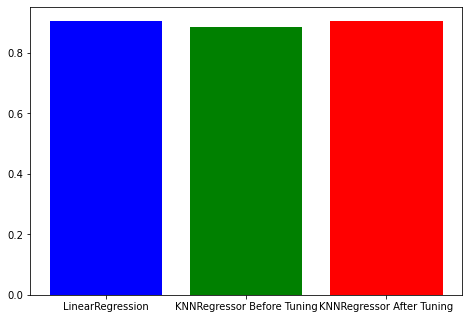

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1, 1])
names = ['LinearRegression','KNNRegressor Before Tuning', 'KNNRegressor After Tuning']
accuracy = [0.9059959607091161, 0.8838502073708883, 0.9036724361032478 ]
ax.bar(names[0],accuracy[0],color='b')
ax.bar(names[1],accuracy[1],color='g')
ax.bar(names[2],accuracy[2],color='r')
plt.show()

# KNN Classifier

In [46]:
wh = pd.read_csv('weight-height.csv')
wh.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [47]:
wh['Gender'] = wh.Gender.replace({'Male':0,'Female':1})

In [48]:
x = wh.drop(['Gender'], axis=1)
y = wh.Gender

In [49]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [50]:
print(x.shape)
print(y.shape)

(8555, 2)
(8555,)


In [51]:
#split train and test data
from sklearn.model_selection import train_test_split

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier()

In [54]:
knn_cls.fit(xtrain, ytrain)

KNeighborsClassifier()

In [55]:
knnClsAccuracy = knn_cls.score(xtest, ytest)
pred_y_knn_cls = knn_cls.predict(xtest)

In [56]:
# Mean Square Error
from sklearn.metrics import mean_squared_error
mse_knn_cls = mean_squared_error(ytest, pred_y_knn_cls)

In [57]:
wh_data['knn_pred_Weight'] = knn_cls.predict(x)

In [58]:
print('Accuracy of KNeighborsClassifier ', knnClsAccuracy)
print('Mean Square Error of KNeighborsClassifier ', mse_knn_cls)
print(wh.head())
print(wh.tail())

Accuracy of KNeighborsClassifier  0.9146864043630697
Mean Square Error of KNeighborsClassifier  0.08531359563693026
   Gender     Height      Weight
0       0  73.847017  241.893563
1       0  68.781904  162.310473
2       0  74.110105  212.740856
3       0  71.730978  220.042470
4       0  69.881796  206.349801
      Gender     Height      Weight
8550       1  60.483946  110.565497
8551       1  63.423372  129.921671
8552       1  65.584057  155.942671
8553       1  67.429971  151.678405
8554       1  60.921791  131.253738


# Optimizing Algorithm with Hyper parameter Tuning

In [59]:
# Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
rscv = RandomizedSearchCV(knn_cls,grids, n_iter=300, cv=3)

In [61]:
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=300,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30, ...],
                                        'p': [1, 2]})

In [62]:
results = pd.DataFrame(rscv.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,param_n_neighbors,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004001,3.371748e-07,0.224050,0.003267,2,777,37,"{'p': 2, 'n_neighbors': 777, 'leaf_size': 37}",0.897796,0.902806,0.915832,0.905478,0.007602,86
1,0.003334,4.712580e-04,0.087686,0.000471,2,212,40,"{'p': 2, 'n_neighbors': 212, 'leaf_size': 40}",0.895792,0.900802,0.919840,0.905478,0.010359,91
2,0.005001,3.371748e-07,0.072019,0.000813,2,63,1,"{'p': 2, 'n_neighbors': 63, 'leaf_size': 1}",0.904309,0.909820,0.921844,0.911991,0.007321,10
3,0.003673,4.696948e-04,0.161029,0.000817,1,499,28,"{'p': 1, 'n_neighbors': 499, 'leaf_size': 28}",0.895792,0.900301,0.918337,0.904810,0.009741,178
4,0.003008,1.123916e-07,0.175365,0.000471,1,548,36,"{'p': 1, 'n_neighbors': 548, 'leaf_size': 36}",0.895792,0.900301,0.918838,0.904977,0.009973,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.003334,4.714266e-04,0.220047,0.000814,1,723,49,"{'p': 1, 'n_neighbors': 723, 'leaf_size': 49}",0.896293,0.899800,0.916834,0.904309,0.008972,217
296,0.003337,4.749108e-04,0.075350,0.000471,1,153,45,"{'p': 1, 'n_neighbors': 153, 'leaf_size': 45}",0.898297,0.902806,0.919339,0.906814,0.009046,56
297,0.003003,3.617543e-06,0.113687,0.000468,2,322,49,"{'p': 2, 'n_neighbors': 322, 'leaf_size': 49}",0.896794,0.898297,0.918838,0.904643,0.010056,200
298,0.004001,2.247832e-07,0.159035,0.000816,1,487,8,"{'p': 1, 'n_neighbors': 487, 'leaf_size': 8}",0.896293,0.899299,0.918838,0.904810,0.009995,178


In [63]:
knn_cls_2 = rscv.best_estimator_

In [64]:
knn_cls_Accuracy = knn_cls_2.score(xtest, ytest)

In [65]:
y_pred_knn_cls_2 = knn_cls_2.predict(xtest)

In [66]:
# Mean Square Error
mse_knn_cls_2 = mean_squared_error(ytest, y_pred_knn_cls_2)

In [67]:
print('Accuracy of KNeighborsClassifier after tuning ', knn_cls_Accuracy)
print('Mean Square Error of KNeighborsClassifier after tuning ', mse_knn_cls_2)

Accuracy of KNeighborsClassifier after tuning  0.9244253992987924
Mean Square Error of KNeighborsClassifier after tuning  0.07557460070120764


# Comparison of KNeighborsClassifer before and after Tuning

In [68]:
print('Accuracy and Mean Square Error of KNeighborsClassifier ',knnClsAccuracy, mse_knn_cls)
print('Accuracy and Mean Square Error of KNeighborsClassifier after tuning ',knn_cls_Accuracy, mse_knn_cls_2)

Accuracy and Mean Square Error of KNeighborsClassifier  0.9146864043630697 0.08531359563693026
Accuracy and Mean Square Error of KNeighborsClassifier after tuning  0.9244253992987924 0.07557460070120764


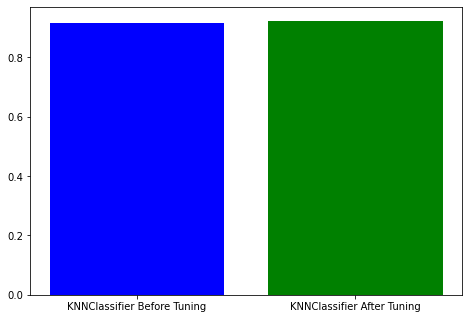

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1, 1])
names = ['KNNClassifier Before Tuning', 'KNNClassifier After Tuning']
accuracy = [0.9146864043630697, 0.9244253992987924 ]
ax.bar(names[0],accuracy[0],color='b')
ax.bar(names[1],accuracy[1],color='g')
plt.show()